# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt



### Importing the dataset

In [2]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(cancer.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [4]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


#### Scale the data since we will be using gradient ascent

In [5]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# TODO - Print the shape of x_train and y_train 
print(X_train.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [7]:
# Append a column of ones to x_train 

# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack
columnOFvectorTrain = np.ones((X_train.shape[0],1))
X_train= np.hstack((columnOFvectorTrain, X_train))

# Now do the same for the test data
columnOFvectorTest = np.ones((X_test.shape[0],1))
X_test = np.hstack((columnOFvectorTest,X_test))

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])


The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Understanding the dataset

In [8]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# You can add your own code here to better understand the dataset


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [10]:
# Write the sigmoid function
def sigmoid(z):
    sigmoid =1 / (1+np.exp(-z))
    return sigmoid

### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [11]:
# Initialize w using np.zeros()
w=np.zeros((X_train.shape[0],1))
# print(w)



### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [12]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
    result= sigmoid ((np.dot(X,w)))
    return result

### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [13]:
def log_likelihood(X , y , w ):
  LogLikelihood = np.sum(y * np.log(hypothesis(X,w)) + (1 - y)*np.log(1 - hypothesis(X,w)))
  return LogLikelihood


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [14]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_list=[]
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X_train.shape[1],1))
    # Initialize N to the number of training examples
    N = X.shape[0]
    for i in range(num_iters):
        # update the w using formula
        w = w - learning_rate*(1/N)*np.dot(X.T,hypothesis(X,w)-y)

        if( (i%100) == 0):
            log_likelihood_list.append(log_likelihood(X,y, w))

     
    return w, log_likelihood_list  

### After completing the code above, run the following

In [15]:
# Set the learning_rate
learning_rate = 0.5
# Set the num_iters
num_iters = 5000
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape((y_train.shape[0],1)), learning_rate, num_iters)
print(w)
print(log_likelihood_values)

[[-0.1056701 ]
 [-0.03553097]
 [-0.0536691 ]
 [ 0.17221516]
 [-0.31116366]
 [-0.45434972]
 [ 2.75131896]
 [-1.30570826]
 [-3.03314808]
 [ 1.16803283]
 [-0.85636742]
 [-3.72793978]
 [ 0.72266145]
 [-0.80953786]
 [-2.47051644]
 [-0.40297532]
 [ 0.53078335]
 [ 0.03099043]
 [-1.27545053]
 [ 1.31001975]
 [ 2.1018566 ]
 [-1.64716699]
 [-2.84431473]
 [-0.20035616]
 [-1.77971341]
 [-0.16157425]
 [ 0.73553297]
 [-2.45713669]
 [-1.31520556]
 [-2.99931319]
 [-0.38232592]]
[-104.3456100525905, -30.613421040599732, -26.67995442741167, -24.764787699393015, -23.544913930501746, -22.66861864092934, -21.995874538657674, -21.45672990771387, -21.009472103607315, -20.62725194414171, -20.29274327718213, -19.99462548460872, -19.725219641902154, -19.479089646022707, -19.252242101930726, -19.041653725735586, -18.84497827588524, -18.660356638383075, -18.486289239717966, -18.32154774276664, -18.16511236690654, -18.0161264094924, -17.873862603144918, -17.737697795406593, -17.60709359420882, -17.48158136455062, -

# Plotting Likelihood v/s Number of Iterations.

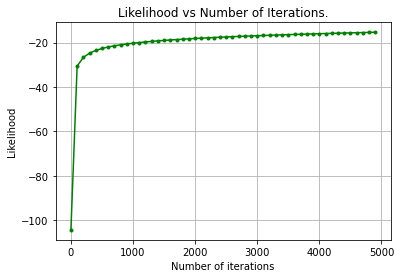

In [16]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [17]:
# use hypothesis(...) to predict.
results_predict = hypothesis(X_test, w)
results_predict[results_predict > 0.5] = 1
results_predict[results_predict < 0.5] = 0

In [18]:
TP=0
FP=0
FN=0
TN=0
for i in range(y_test.shape[0]):
    # count TP,FP,FN,FP
    if (y_test[i] == 0 and results_predict [i] == 0):
        TN=TN+1
    elif (y_test[i] == 1 and results_predict[i] == 0):
        FN=FN+1
    elif (y_test[i] == 0 and results_predict[i] == 1):
        FP=FP+1
    elif (y_test[i] == 1 and results_predict[i] == 1):
        TP=TP+1


        
# calculate precision, recall and f1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2* (precision*recall))/(precision+recall)
p= precision*100
r= recall*100
f= f1*100

print("Precision: ",str((p))+" %")
print("Recall: ",str((r))+" %")
print("F1: ",str(f)+"%")
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

Precision:  98.85057471264368 %
Recall:  96.62921348314607 %
F1:  97.72727272727273%
Confusion Matrix: 
TP:  86  FN:  3  FP:  1  TN:  53


## Use the test set as a validation set and see if you can find a better setting of the hyperparameters. Report the best values you found.
I wrote a function bellow that prints out all of the results using learning rate from 0.01 to 0.7 with a step of 0.01, and itteration from 5000 to 40000 with a jump of 5000 steps. Then I did comman f and searched for the highest precesion/recall/f1(EX command f + "100./99./98" and saw the results. The results between 0.01 to 0.1 learning rate were relativly the highest with the itteration of 5000. I looked through the results and tried to compare using the commad f on they keyboard and thats how i found the highest set of results between all of the them are learning rate 0.03 and 0.04 and the itteration is 5000. The ratio depends on how small the learning rate is, and the itteration is different from a test to another.
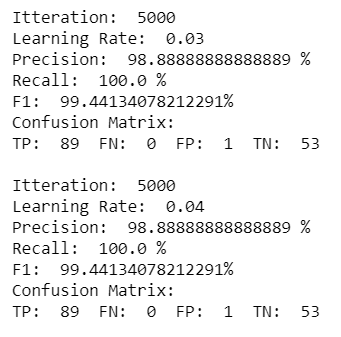

In [ ]:
def drange2(start, stop, step):
    numelements = int((stop-start)/float(step))
    for i in range(numelements+1):
            yield start + i*step
for j in range(5000,40000,5000):
    for n in drange2(0.01, 0.5, 0.01):
        w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train.reshape((y_train.shape[0],1)), n, j)
        results_predict = hypothesis(X_test, w)
        results_predict[results_predict > 0.5] = 1
        results_predict[results_predict < 0.5] = 0
        TP=0
        FP=0
        FN=0
        TN=0
        for i in range(y_test.shape[0]):
            # count TP,FP,FN,FP
            if (y_test[i] == 0 and results_predict [i] == 0):
                TN=TN+1
            elif (y_test[i] == 1 and results_predict[i] == 0):
                FN=FN+1
            elif (y_test[i] == 0 and results_predict[i] == 1):
                FP=FP+1
            elif (y_test[i] == 1 and results_predict[i] == 1):
                TP=TP+1



        # calculate precision, recall and f1
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        f1 = (2* (precision*recall))/(precision+recall)
        p= precision*100
        r= recall*100
        f= f1*100
        print("Itteration: ",j)
        print("Learning Rate: ",n)
        print("Precision: ",str((p))+" %")
        print("Recall: ",str((r))+" %")
        print("F1: ",str(f)+"%")
        print("Confusion Matrix: ")
        print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)
        print()

        

        

Itteration:  5000
Learning Rate:  0.01
Precision:  98.87640449438202 %
Recall:  98.87640449438202 %
F1:  98.87640449438202%
Confusion Matrix: 
TP:  88  FN:  1  FP:  1  TN:  53

Itteration:  5000
Learning Rate:  0.02
Precision:  98.87640449438202 %
Recall:  98.87640449438202 %
F1:  98.87640449438202%
Confusion Matrix: 
TP:  88  FN:  1  FP:  1  TN:  53

Itteration:  5000
Learning Rate:  0.03
Precision:  98.88888888888889 %
Recall:  100.0 %
F1:  99.44134078212291%
Confusion Matrix: 
TP:  89  FN:  0  FP:  1  TN:  53

Itteration:  5000
Learning Rate:  0.04
Precision:  98.88888888888889 %
Recall:  100.0 %
F1:  99.44134078212291%
Confusion Matrix: 
TP:  89  FN:  0  FP:  1  TN:  53

Itteration:  5000
Learning Rate:  0.05
Precision:  98.87640449438202 %
Recall:  98.87640449438202 %
F1:  98.87640449438202%
Confusion Matrix: 
TP:  88  FN:  1  FP:  1  TN:  53

Itteration:  5000
Learning Rate:  0.060000000000000005
Precision:  98.86363636363636 %
Recall:  97.75280898876404 %
F1:  98.3050847457627%


<ipython-input-13-c7116bc0e869>:2: RuntimeWarning: divide by zero encountered in log
  LogLikelihood = np.sum(y * np.log(hypothesis(X,w)) + (1 - y)*np.log(1 - hypothesis(X,w)))
<ipython-input-13-c7116bc0e869>:2: RuntimeWarning: invalid value encountered in multiply
  LogLikelihood = np.sum(y * np.log(hypothesis(X,w)) + (1 - y)*np.log(1 - hypothesis(X,w)))


Itteration:  20000
Learning Rate:  0.4
Precision:  98.83720930232558 %
Recall:  95.50561797752809 %
F1:  97.14285714285714%
Confusion Matrix: 
TP:  85  FN:  4  FP:  1  TN:  53

Itteration:  20000
Learning Rate:  0.41000000000000003
Precision:  98.83720930232558 %
Recall:  95.50561797752809 %
F1:  97.14285714285714%
Confusion Matrix: 
TP:  85  FN:  4  FP:  1  TN:  53

Itteration:  20000
Learning Rate:  0.42000000000000004
Precision:  98.82352941176471 %
Recall:  94.3820224719101 %
F1:  96.55172413793103%
Confusion Matrix: 
TP:  84  FN:  5  FP:  1  TN:  53

Itteration:  20000
Learning Rate:  0.43
Precision:  98.82352941176471 %
Recall:  94.3820224719101 %
F1:  96.55172413793103%
Confusion Matrix: 
TP:  84  FN:  5  FP:  1  TN:  53

Itteration:  20000
Learning Rate:  0.44
Precision:  98.82352941176471 %
Recall:  94.3820224719101 %
F1:  96.55172413793103%
Confusion Matrix: 
TP:  84  FN:  5  FP:  1  TN:  53

Itteration:  20000
Learning Rate:  0.45
Precision:  98.82352941176471 %
Recall:  94.